In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
from sklearn.datasets import load_boston
boston_data = load_boston()
df = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)

In [3]:
y = boston_data.target

In [4]:
from sklearn.tree import DecisionTreeRegressor

In [12]:
tree = DecisionTreeRegressor(max_depth=2)

In [13]:
X = df[['LSTAT']].values

In [14]:
tree.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [15]:
sort_idx = X.flatten().argsort()

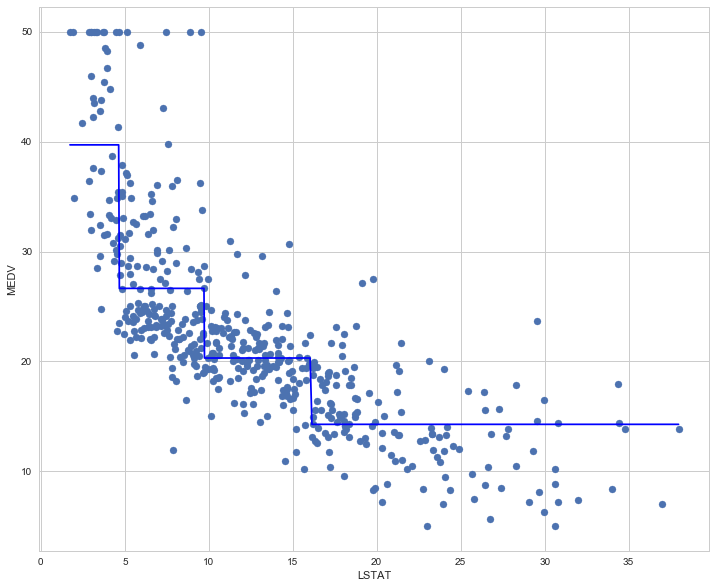

In [16]:
plt.figure(figsize=(12,10))
plt.scatter(X[sort_idx], y[sort_idx])
plt.plot(X[sort_idx], tree.predict(X[sort_idx]), c='b')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')

# Random Forest

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [18]:
X = df.values
#y = df['MEDV].values

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                   random_state=40)

In [22]:
from sklearn.ensemble import RandomForestRegressor

In [24]:
forest = RandomForestRegressor(n_estimators=500, criterion='mse',
                              random_state=40)

In [25]:
forest.fit(X,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=500, n_jobs=1, oob_score=False, random_state=40,
           verbose=0, warm_start=False)

In [27]:
y_train_pred = forest.predict(X_train)

In [28]:
y_test_pred = forest.predict(X_test)

In [29]:
print("MSE train: {0:.4f}, test: {1:4f}".\
      format(mean_squared_error(y_train, y_train_pred),
                                 mean_squared_error(y_test, y_test_pred)))

MSE train: 1.3581, test: 1.502560


In [30]:
print("R^2 train: {0:.4f}, test:{1:.4f}".\
      format(r2_score(y_train, y_train_pred),
                                 r2_score(y_test, y_test_pred)))

R^2 train: 0.9810, test:0.9869


# AdaBoost

In [32]:
from sklearn.ensemble import AdaBoostRegressor

In [36]:
ada = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4), n_estimators=500, random_state=42)

In [37]:
ada.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best'),
         learning_rate=1.0, loss='linear', n_estimators=500,
         random_state=42)

In [38]:
y_train_pred = ada.predict(X_train)

In [39]:
y_test_pred = ada.predict(X_test)

In [40]:
print("MSE train: {0:.4f}, test: {1:.4f}".\
     format(mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))

MSE train: 3.8318, test: 23.2597


In [41]:
print("R^2 train: {0:.4f}, test: {1:.4f}".\
     format(r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)))

R^2 train: 0.9464, test: 0.7965


# Features Importance 

# AdaBoost

In [42]:
ada.feature_importances_

array([ 0.043528  ,  0.00123263,  0.0512262 ,  0.00328904,  0.03242895,
        0.30958204,  0.01339203,  0.11545186,  0.00277724,  0.03300816,
        0.06939693,  0.01643661,  0.30825032])

In [43]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [45]:
result = pd.DataFrame(ada.feature_importances_, df.columns)
result.columns = ['feature']

In [46]:
result.sort_values(by='feature', ascending=False)

,feature
RM,0.309582
LSTAT,0.308250
DIS,0.115452
PTRATIO,0.069397
INDUS,0.051226
CRIM,0.043528
TAX,0.033008
NOX,0.032429
B,0.016437
AGE,0.013392


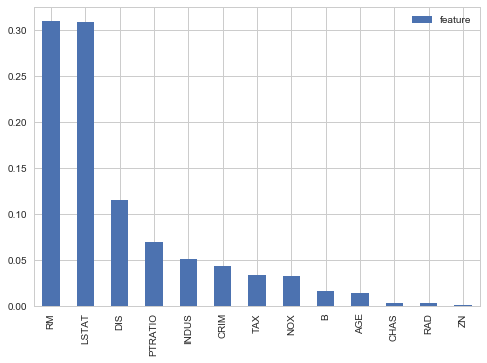

In [47]:
result.sort_values(by='feature', ascending=False).plot(kind='bar');

# RandomForest

In [48]:
forest.feature_importances_

array([ 0.03758156,  0.00116852,  0.00590242,  0.00090738,  0.024012  ,
        0.43014947,  0.01272909,  0.06768252,  0.00327585,  0.01431285,
        0.01683139,  0.01150633,  0.37394062])

In [49]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [51]:
df = pd.DataFrame(forest.feature_importances_, df.columns)
result.columns = ['feature']

In [52]:
result.sort_values(by='feature', ascending=False)

,feature
RM,0.309582
LSTAT,0.308250
DIS,0.115452
PTRATIO,0.069397
INDUS,0.051226
CRIM,0.043528
TAX,0.033008
NOX,0.032429
B,0.016437
AGE,0.013392


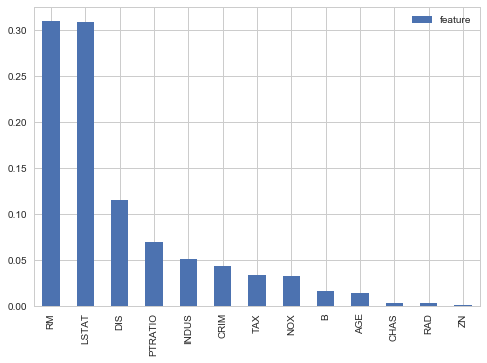

In [53]:
result.sort_values(by='feature', ascending=False).plot(kind='bar');